# CASE STUDY 2, 
#1. Understanding relation between weight and BMI and some other observations

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/home/sunit.kapuria/data analyst course/case_study_2/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [4]:
df.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [6]:
df['Id'].nunique()

8

* Data is only available for 8 users

In [11]:
df['Date']=pd.to_datetime(df['Date'])

<AxesSubplot:>

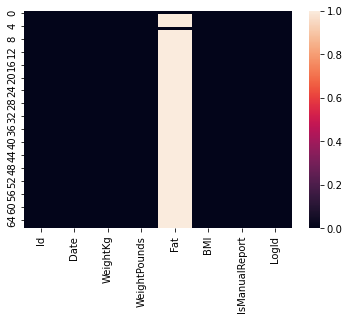

In [12]:
fig=plt.subplots()
sns.heatmap(df.isna())

It shows that maximum values of Fat is null, which means, the device is not automatically able to fill it and the user are also not very active in filling it

In [13]:
fig.savefig('/home/sunit.kapuria/data analyst course/case_study_2/fat.png')

AttributeError: 'tuple' object has no attribute 'savefig'

lets drop the FAT field

All other field are obserevd to be in right format and there is no missing values

In [19]:
df.drop(labels=['Fat'], axis=1, inplace=True)

In [20]:
df.head()

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,21.690001,True,1463097599000


Lets groupby by ID and check the weights in pounds. We can also drop weight in Kg as the column is repeating.

In [21]:
df.drop(labels=['WeightKg'], axis=1, inplace=True)

In [22]:
df.head(2)

,Id,Date,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,115.963147,22.65,True,1462233599000
1,1503960366,2016-05-03 23:59:59,115.963147,22.65,True,1462319999000


we should round the values in "WeightPounds" upto two decimal point

In [23]:
df['WeightPounds']=df['WeightPounds'].apply(lambda x: round(x,2))

In [24]:
df.head(2)

,Id,Date,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,115.96,22.65,True,1462233599000
1,1503960366,2016-05-03 23:59:59,115.96,22.65,True,1462319999000


The "LogId" field does not seem to give any unique information and therefore can be dropped

In [25]:
df.drop(labels=['LogId'], axis=1, inplace=True)

In [26]:
df.head(2)

,Id,Date,WeightPounds,BMI,IsManualReport
0,1503960366,2016-05-02 23:59:59,115.96,22.65,True
1,1503960366,2016-05-03 23:59:59,115.96,22.65,True


Let us check what is the average weight and BMI of each user

In [38]:
g=df.groupby("Id")
g.agg(["count","mean"])[["WeightPounds", "BMI"]]
    

WeightPounds              BMI           
                  count       mean count       mean
Id                                                 
1503960366            2  115.96000     2  22.650000
1927972279            1  294.32000     1  47.540001
2873212765            2  125.66000     2  21.570001
4319703577            2  159.50000     2  27.415000
4558609924            5  153.52800     5  27.214000
5577150313            1  199.96000     1  28.000000
6962181067           30  135.70100    30  24.028000
8877689391           24  187.71375    24  25.487083

Few observations:
* maximum users do not tend to keep track of the weight, BMI, in the tracker.
* Out of 30 users, we have data only for 8 users here, which indicates that the rest of the user either skipped the process of filling the form, or do not feel the need to use this feature in the smart device.
* Another reason of having low data for this might be diffulty in filling the values in the device for some reasons.

Lets check how many of this data is filled manually and how many is filled automatically.

<AxesSubplot:xlabel='IsManualReport', ylabel='count'>

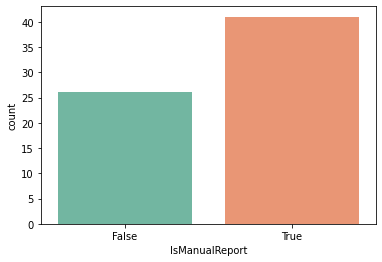

In [15]:
sns.countplot(x='IsManualReport', data=df, palette='Set2')

This observation shows that most of the values are formed manually by the user. This can be one of the reason behind low data as most users finds it defficult many times to calculate BMI and fill that it. 
* It might be easier to keep track of the BMI if it is calculated automatically, given that the user only have to fill the weight values.

In [43]:
g=df.groupby("Id").mean()[["WeightPounds", "BMI"]]
g

,WeightPounds,BMI
Id,,
1503960366,115.96000,22.650000
1927972279,294.32000,47.540001
2873212765,125.66000,21.570001
4319703577,159.50000,27.415000
4558609924,153.52800,27.214000
5577150313,199.96000,28.000000
6962181067,135.70100,24.028000
8877689391,187.71375,25.487083


In [48]:
g.reset_index(inplace=True)

In [49]:
g.head(2)

,Id,WeightPounds,BMI
0,1503960366,115.96,22.650000
1,1927972279,294.32,47.540001


Lets check the relation between the two parameters using linear regression

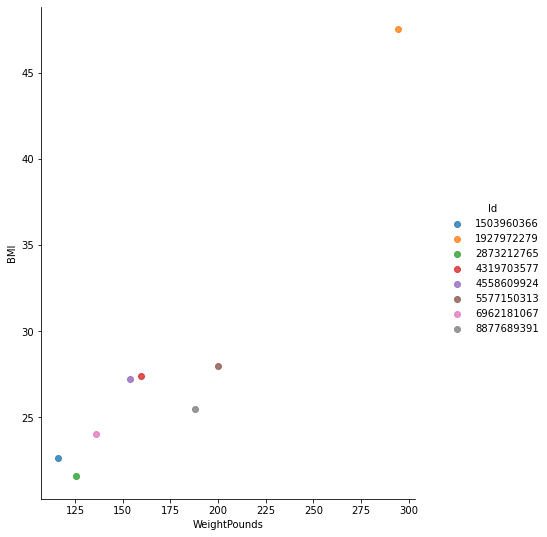

In [50]:
gb=sns.lmplot(x='WeightPounds', y='BMI', hue='Id',data=g, fit_reg=True)
gb.fig.set_figwidth(8)
gb.fig.set_figheight(8)


Text(0.5, 1.0, 'Weight Vs BMI')

<Figure size 432x288 with 0 Axes>

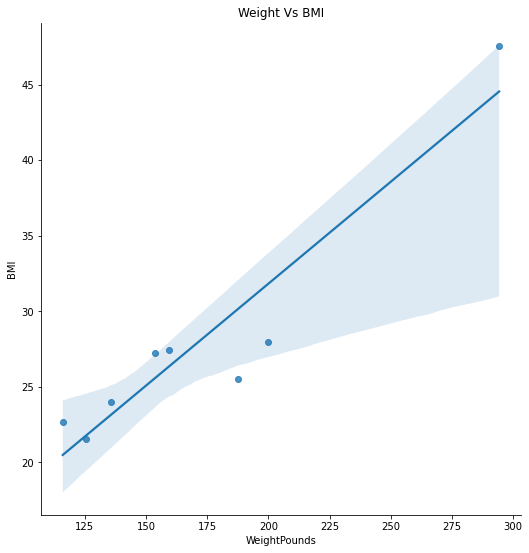

In [52]:
fig=plt.figure()
gb=sns.lmplot(x='WeightPounds', y='BMI',data=g, fit_reg=True)
gb.fig.set_figwidth(8)
gb.fig.set_figheight(8)
plt.title('Weight Vs BMI')

Lets save the average mean, and BMI of these users to a new CSV file for further analysis

In [59]:
g.to_csv('/home/sunit.kapuria/data analyst course/case_study_2/weightvsbmi.csv', index=False)

In [60]:
df1=pd.read_csv("/home/sunit.kapuria/data analyst course/case_study_2/weightvsbmi.csv")

In [61]:
df1.head()

,Id,WeightPounds,BMI
0,1503960366,115.960,22.650000
1,1927972279,294.320,47.540001
2,2873212765,125.660,21.570001
3,4319703577,159.500,27.415000
4,4558609924,153.528,27.214000
